# Data Science for Good: CareerVillage.org
Kimberly Garasky  
Suraj Suresh  
Dennis Voronov

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
import spacy
nltk.download("stopwords")
from nltk.corpus import stopwords
nlp = spacy.load('en_core_web_sm')
from nltk.stem import PorterStemmer

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# read in data
ans = pd.read_csv("answers.csv")
ans_scores = pd.read_csv("answer_scores.csv")
comments = pd.read_csv("comments.csv")
emails = pd.read_csv("emails.csv")
group_mem = pd.read_csv("group_memberships.csv")
groups = pd.read_csv("groups.csv")
matches = pd.read_csv("matches.csv")
prof = pd.read_csv("professionals.csv")
questions = pd.read_csv("questions.csv")
students = pd.read_csv("students.csv")
tag_ques = pd.read_csv("tag_questions.csv")
tag_users = pd.read_csv("tag_users.csv")
tags = pd.read_csv("tags.csv")
school_memberships = pd.read_csv("school_memberships.csv")

In [4]:
# format date variables
ans['answers_date_added'] = pd.to_datetime(ans['answers_date_added'], infer_datetime_format=True)
comments['comments_date_added'] = pd.to_datetime(comments['comments_date_added'], infer_datetime_format=True)
emails['emails_date_sent'] = pd.to_datetime(emails['emails_date_sent'], infer_datetime_format=True)
prof['professionals_date_joined'] = pd.to_datetime(prof['professionals_date_joined'], infer_datetime_format=True)
questions['questions_date_added'] = pd.to_datetime(questions['questions_date_added'], infer_datetime_format=True)
students['students_date_joined'] = pd.to_datetime(students['students_date_joined'], infer_datetime_format=True)

## missing data

We will explore if students and professionals are utilizing the site and have completed their profiles. We will look at: questions (students), answers (professionals), location, industry (professionals), headline (professionals), comments, tags, groups, and schools.
    
    

In [5]:
# students

student_data = students.copy()

# questions
questions_author_id = questions[["questions_author_id"]].drop_duplicates()

# comments
comments_author_id = comments[["comments_author_id"]].drop_duplicates()

# tags
tag_users_user_id = tag_users[["tag_users_user_id"]].drop_duplicates()

# groups
group_memberships_user_id = group_mem[["group_memberships_user_id"]].drop_duplicates()

# schools
school_memberships_user_id = school_memberships[["school_memberships_user_id"]].drop_duplicates()


student_data = student_data.merge(questions_author_id, how='left', left_on='students_id', right_on='questions_author_id')\
                .merge(comments_author_id, how='left', left_on='students_id', right_on='comments_author_id')\
                .merge(tag_users_user_id, how='left', left_on='students_id', right_on='tag_users_user_id')\
                .merge(group_memberships_user_id, how='left', left_on='students_id', right_on='group_memberships_user_id')\
                .merge(school_memberships_user_id, how='left', left_on='students_id', right_on='school_memberships_user_id')

#drop unneeded columns
student_data=student_data.drop(columns=['students_id', 'students_date_joined'])

# create dataframe for plot 
# percentage of data that is existing/missing for each variable
student_data_plot = pd.DataFrame(student_data.notna().mean()).rename(columns={0:'Exists'})
student_data_plot['Missing'] = pd.DataFrame(student_data.isna().mean())

student_data_plot = student_data_plot.transpose().rename(columns={'students_location': 'Location', 
                                                                  'questions_author_id':'Questions', 
                                                                  'comments_author_id':'Comments',
                                                                  'tag_users_user_id':'Tags', 
                                                                  'group_memberships_user_id': 'Groups', 
                                                                  'school_memberships_user_id': 'Schools'})

student_data_plot

,Location,Questions,Comments,Tags,Groups,Schools
Exists,0.934358,0.397275,0.087921,0.148784,0.007588,0.034226
Missing,0.065642,0.602725,0.912079,0.851216,0.992412,0.965774


In [6]:
# professionals

prof_data = prof.copy()

# answers
answers_author_id = ans[["answers_author_id"]].drop_duplicates()

# comments
comments_author_id = comments[["comments_author_id"]].drop_duplicates()

# tags
tag_users_user_id = tag_users[["tag_users_user_id"]].drop_duplicates()

# groups
group_memberships_user_id = group_mem[["group_memberships_user_id"]].drop_duplicates()

# schools
school_memberships_user_id = school_memberships[["school_memberships_user_id"]].drop_duplicates()


prof_data = prof_data.merge(answers_author_id, how='left', left_on='professionals_id', right_on='answers_author_id')\
            .merge(comments_author_id, how='left', left_on='professionals_id', right_on='comments_author_id')\
            .merge(tag_users_user_id, how='left', left_on='professionals_id', right_on='tag_users_user_id')\
            .merge(group_memberships_user_id, how='left', left_on='professionals_id', right_on='group_memberships_user_id')\
            .merge(school_memberships_user_id, how='left', left_on='professionals_id', right_on='school_memberships_user_id')

#drop unneeded columns
prof_data=prof_data.drop(columns=['professionals_id', 'professionals_date_joined'])

# create dataframe for plot 
# percentage of data that is existing/missing for each variable
prof_data_plot = pd.DataFrame(prof_data.notna().mean()).rename(columns={0:'Exists'})
prof_data_plot['Missing'] = pd.DataFrame(prof_data.isna().mean())

prof_data_plot = prof_data_plot.transpose().rename(columns={'professionals_location': 'Location', 
                                                            'professionals_industry': 'Industry', 
                                                            'professionals_headline': 'Headline', 
                                                            'answers_author_id': 'Answers', 
                                                            'comments_author_id':'Comments', 
                                                            'tag_users_user_id':'Tags', 
                                                            'group_memberships_user_id': 'Groups', 
                                                            'school_memberships_user_id': 'Schools'})

prof_data_plot

,Location,Industry,Headline,Answers,Comments,Tags,Groups,Schools
Exists,0.889955,0.908497,0.926577,0.357594,0.052359,0.909136,0.017477,0.075341
Missing,0.110045,0.091503,0.073423,0.642406,0.947641,0.090864,0.982523,0.924659


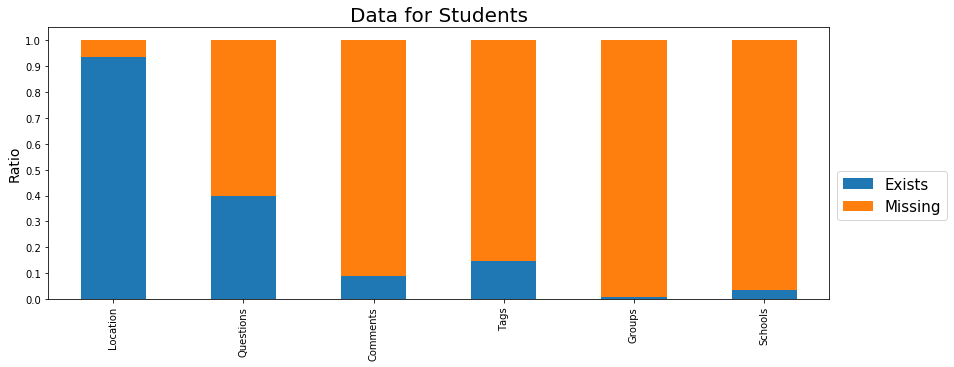

In [7]:
# student plot

student_data_plot.T.plot(kind='bar', stacked=True, figsize=(14, 5))
plt.ylabel('Ratio', fontsize=14)
plt.title('Data for Students', fontsize=20)
plt.yticks(np.arange(0, 1.05, 0.1))
leg = plt.legend(bbox_to_anchor=(1, 0.5), fontsize=15)

plt.show()

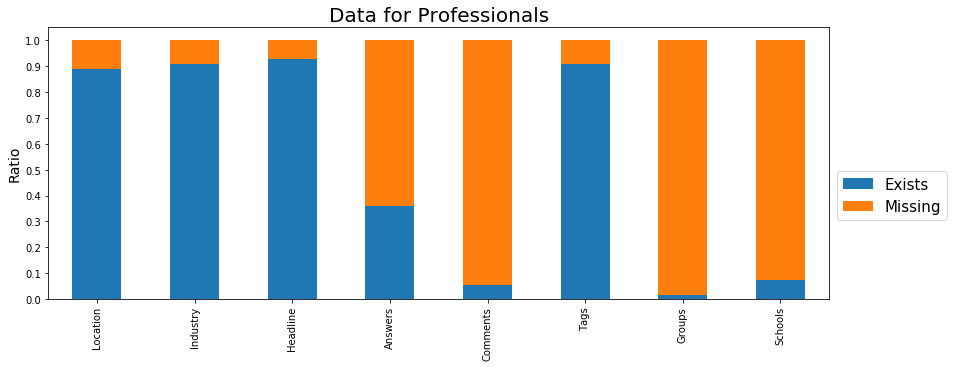

In [8]:
# professionals plot

prof_data_plot.T.plot(kind='bar', stacked=True, figsize=(14, 5))
plt.ylabel('Ratio', fontsize=14)
plt.title('Data for Professionals', fontsize=20)
plt.yticks(np.arange(0, 1.05, 0.1))
leg = plt.legend(bbox_to_anchor=(1, 0.5), fontsize=15)

plt.show()

Almost all (90%) students have provided their location, and about 40% have asked at least one question. Students are not really utilizing the comments, tags, groups or schools features.  
Professionals are providing their location at approximately the same rate as students. Professionals are also widely (90%) providing their industry and headline. Around 40% have answered at least one question. Unlike students, most professionals (90%) are using tags. Like students, professionals are rarely members of groups or schools. 

In [9]:
# location - most students and professionals provide their location
# plot top 20 locations

s_location_20 = pd.DataFrame(students['students_location'].value_counts()).\
                head(20).sort_values(by='students_location', ascending=True)

p_location_20 = pd.DataFrame(prof['professionals_location'].value_counts()).\
                head(20).sort_values(by='professionals_location', ascending=True)


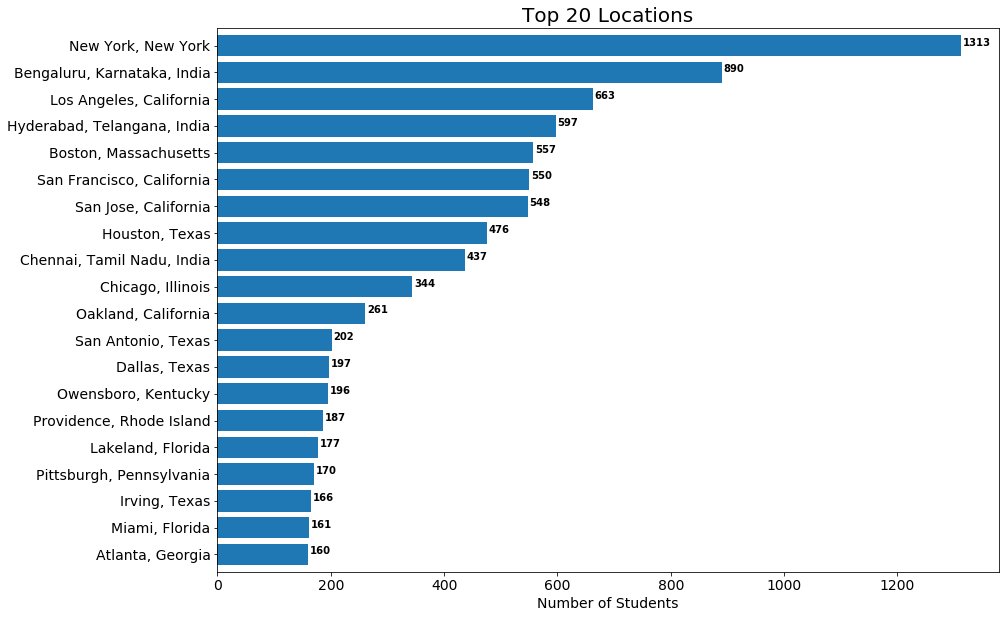

In [10]:
# student location plot

ax = s_location_20.plot(kind='barh',figsize=(14, 10),width=0.8, fontsize=14, legend=None)
ax.set_title('Top 20 Locations', fontsize=20)
ax.set_xlabel('Number of Students', fontsize=14)

for i, v in enumerate(s_location_20['students_location']):
    ax.text(v + 3, i, str(v), fontweight='bold')
    
plt.show()

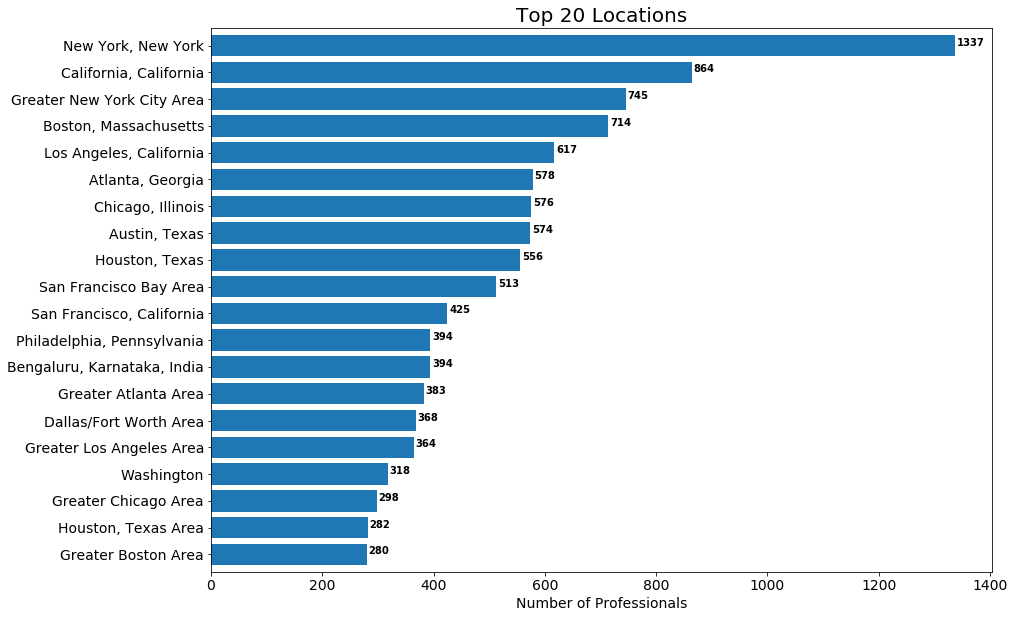

In [11]:
# professionals location plot

ax = p_location_20.plot(kind='barh',figsize=(14, 10),width=0.8, fontsize=14, legend=None)
ax.set_title('Top 20 Locations', fontsize=20)
ax.set_xlabel('Number of Professionals', fontsize=14)

for i, v in enumerate(p_location_20['professionals_location']):
    ax.text(v + 3, i, str(v), fontweight='bold')
    
plt.show()

The top location for students and professionals is New York. Many of the top 20 locations are overlapping, such as Los Angeles, Houston, and Bengaluru.

## Growth
Next, we will look at the growth of students and professionals, and the number of questions and answers per yer since Career Village was founded in 2011.

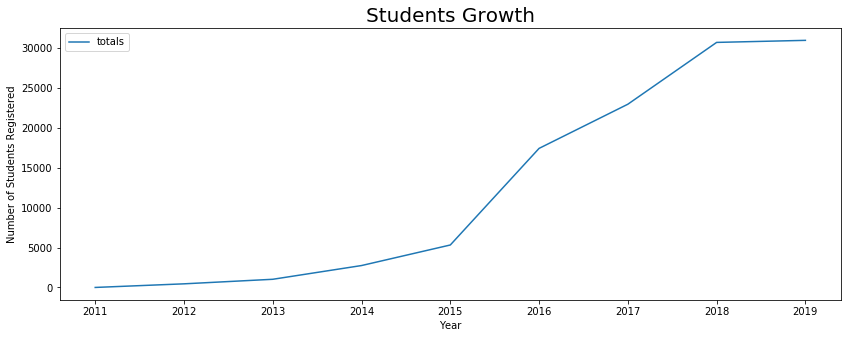

In [12]:
# student growth
# total students registered = 30971

# count number of students joined for each year
student_growth = pd.DataFrame(students['students_date_joined'].groupby([students['students_date_joined'].dt.year]).\
                              agg({'count'}))

# from count calculate total (cumulative)
totals =[]
total = 0
for i in student_growth['count']:
    totals.append(total+i)
    total = total+i
    
student_growth['totals'] = totals

# plot of years and totals
student_growth.drop(columns=['count']).plot(kind='line', figsize=(14,5))
plt.title('Students Growth', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of Students Registered')
plt.show()


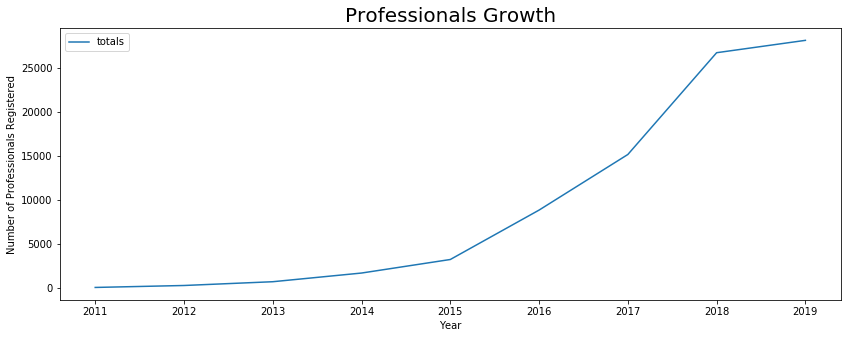

In [13]:
# professional growth
# total professionals registered = 28152

# count number of students joined for each year
prof_growth = pd.DataFrame(prof['professionals_date_joined'].groupby([prof['professionals_date_joined'].dt.year]).\
                           agg({'count'}))

# from count calculate total (cumulative)
totals =[]
total = 0
for i in prof_growth['count']:
    totals.append(total+i)
    total = total+i
    
prof_growth['totals'] = totals

# plot
prof_growth.drop(columns=['count']).plot(kind='line', figsize=(14,5))
plt.title('Professionals Growth', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of Professionals Registered')
plt.show()



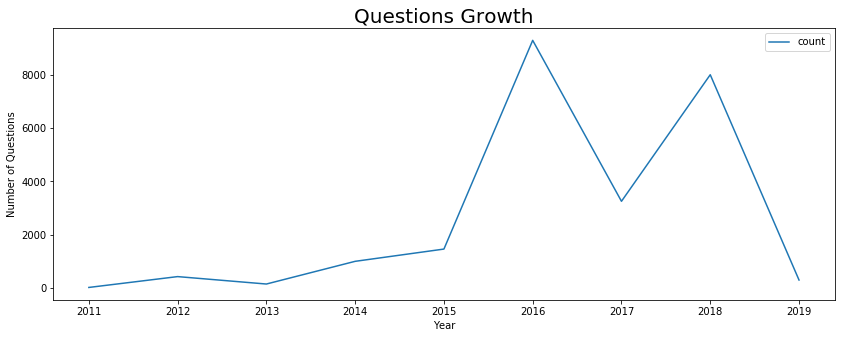

In [14]:
# questions growth
# total questions = 23931

# count number of students joined for each year
ques_growth = pd.DataFrame(questions['questions_date_added'].groupby([questions['questions_date_added'].dt.year]).\
                           agg({'count'}))

# plot
ques_growth.plot(kind='line', figsize=(14,5))
plt.title('Questions Growth', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of Questions')
plt.show()

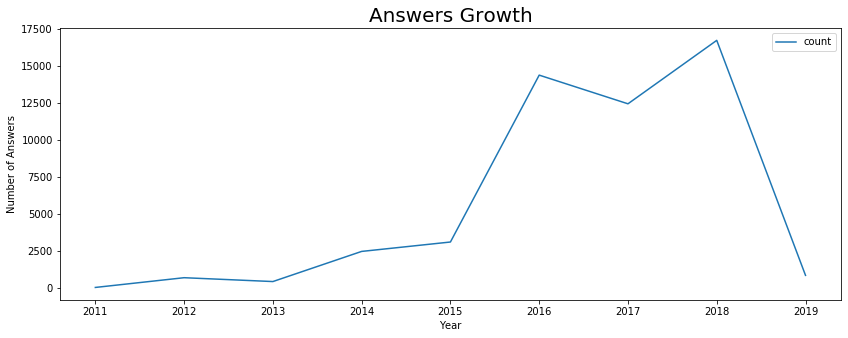

In [15]:
# answers growth
# total answers = 51123

# count number of students joined for each year
ans_growth = pd.DataFrame(ans['answers_date_added'].groupby([ans['answers_date_added'].dt.year]).agg({'count'}))

# plot
ans_growth.plot(kind='line', figsize=(14,5))
plt.title('Answers Growth', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of Answers')
plt.show()

The growth charts show us that growth in students and professionals is steady. Questions and answers have similar growth, however it is unclear what caused a decrease in questions and answers in 2018.

## Student questions and professionals answers amounts
In the next section we will explore how many questions students are asking, and how many answers professionals are providing.

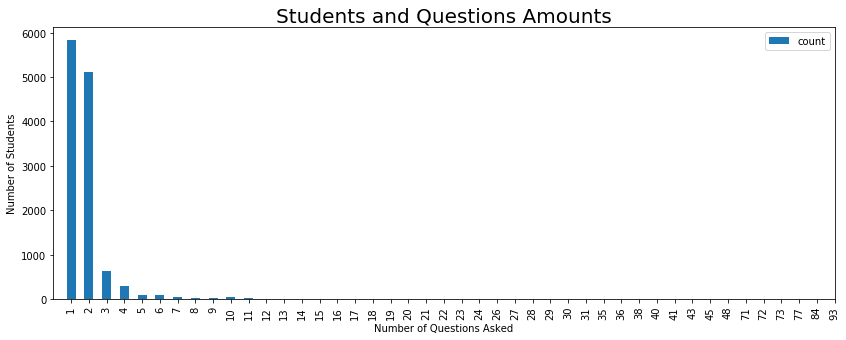

In [16]:
# students

# count how many questions each student has asked
student_auth = pd.DataFrame(questions['questions_author_id'].groupby(questions['questions_author_id']).agg({'count'}))

# aggregate by count
student_ques = pd.DataFrame(student_auth['count'].groupby(student_auth['count']).agg({'count'}))

# plot
student_ques.plot(kind='bar', figsize=(14,5))
plt.title('Students and Questions Amounts', fontsize=20)
plt.xlabel('Number of Questions Asked')
plt.ylabel('Number of Students')
plt.xlim(-1, 43)
plt.show()

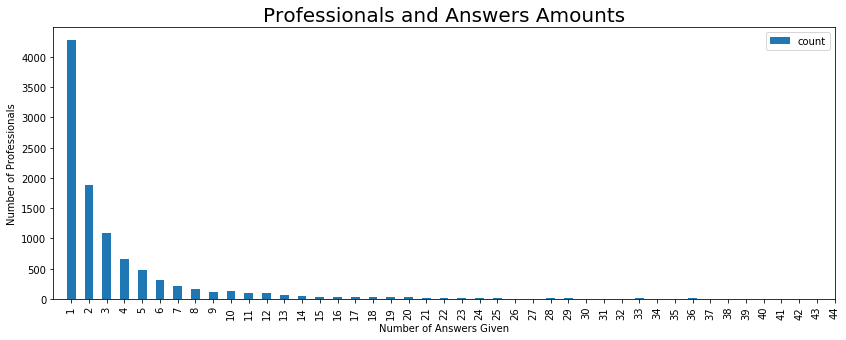

In [17]:
# professionals

# count how many answers each professional has given
prof_auth = pd.DataFrame(ans['answers_author_id'].groupby(ans['answers_author_id']).agg({'count'}))

# aggregate by count
prof_ans = pd.DataFrame(prof_auth['count'].groupby(prof_auth['count']).agg({'count'}))

# plot
prof_ans.plot(kind='bar', figsize=(14,5))
plt.title('Professionals and Answers Amounts', fontsize=20)
plt.xlabel('Number of Answers Given')
plt.ylabel('Number of Professionals')
plt.xlim(-1, 43)
plt.show()

From the charts, we can see that most students ask only one or two questions, and most professionals answer only one or two questions. We also know that only about 40 percent of registered students and registered professionals are asking and answering questions.

## Top Students with the Most Questions and Professionals with the Most Answers
Above we saw that most students and professionals are only asking or answers one or two questions. Next we will see how many questions the top students are asking and the top professionals are answering.

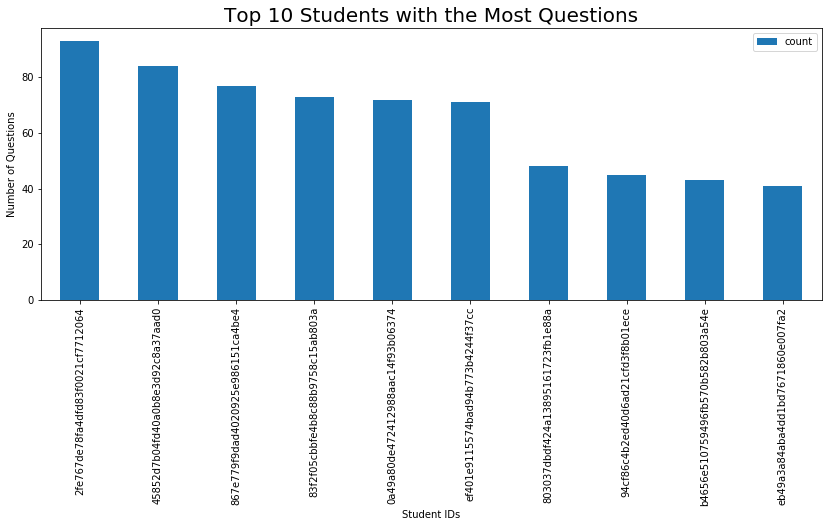

In [18]:
# students
student_auth.sort_values(by='count', ascending=False).head(10).plot(kind='bar', figsize=(14,5))
plt.title('Top 10 Students with the Most Questions', fontsize=20)
plt.xlabel('Student IDs')
plt.ylabel('Number of Questions')
plt.show()

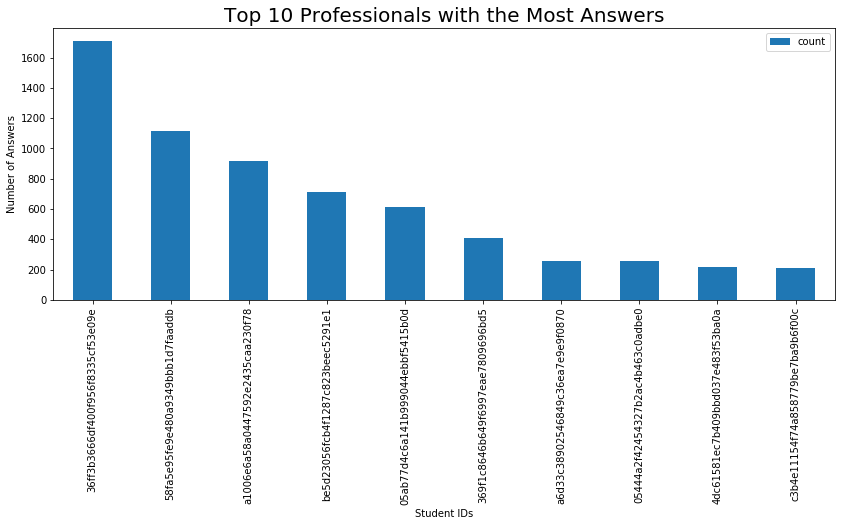

In [19]:
# profesionals
prof_auth.sort_values(by='count', ascending=False).head(10).plot(kind='bar', figsize=(14,5))
plt.title('Top 10 Professionals with the Most Answers', fontsize=20)
plt.xlabel('Student IDs')
plt.ylabel('Number of Answers')
plt.show()

The top 10 students have all asked fewer than 100 questions each. The top 10 professionals have all answered more than 200 questions, and the top 2 have each answered more than a 1000. In fact, the top 10 professionals have provided approximately 12.5 percent of the 51123 answers on the site.   
We will drop the top two professionals from the dataset as they are outliers.

## Questions and Answers
There have been 23,931 questions asked and 51,123 answers provided on the site. But does every question get answered? We explore this next.

In [20]:
q_id = questions[["questions_id"]]
a_id = ans["answers_question_id"].drop_duplicates()

q_id =q_id.merge(a_id, how='left', left_on='questions_id', right_on='answers_question_id')

print('Number of questions not answered: ', q_id['answers_question_id'].isnull().sum())


Number of questions not answered:  821


In [21]:
# save unanswered question ids in a list  - could explore why they weren't answered (topics?, date posted?)

q_not_answered = q_id[q_id['answers_question_id'].isnull()].drop(columns='answers_question_id')

q_not_answered = list(q_not_answered['questions_id'])



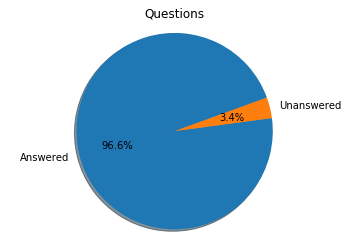

In [22]:
# plot

answered = ((len(questions['questions_id']) - len(q_not_answered)) / len(questions['questions_id'])) * 100
unanswered = (len(q_not_answered) / len(questions['questions_id'])) * 100
                                                                     
labels = 'Answered', 'Unanswered'
sizes = [answered, unanswered]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=20)
ax1.axis('equal') 
plt.title("Questions")

plt.show()

In [23]:
# drop professionals with missing data
prof = prof.dropna(axis = 0)
prof = prof.reset_index(drop = True)
prof

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,68ecc66323b8418092fdd724aaf5be94,"New York, New York",Special Events,Event Hospitality & Operations Specialist,2011-12-26 05:00:00+00:00
1,c79d4e4fd9af4ab7a7e6b6f433128476,"New York, New York","education, tech, media","media, technology, education",2011-12-26 05:00:00+00:00
2,1e4cc96c24344c8b806c26c3e6746167,"Boston, Massachusetts",Hospitality & Consulting,Hospitality and Restaurant Consultant,2011-12-28 14:35:42+00:00
3,1ec14aee9311480681dfa81b0f193de8,"Denton, Texas",Software,Google Software Engineer,2012-01-15 19:21:07+00:00
4,ccad7c94952a49b9ad0fb85b09d1398d,"New York, New York",Mobile,Co-founder of mobile fashion shopping app,2012-01-23 16:54:25+00:00
...,...,...,...,...,...
22899,9f267950ab8e43e2afcf564327049297,"El Segundo, California",Broadcast Media,"AVP, Technology at AT&T",2019-01-31 23:48:32+00:00
22900,4a7e1e5dd884488da283e1cab6ad11e0,"Alexandria, Virginia",Telecommunications,"Operations Manager, FirstNet Public Sector Sol...",2019-01-31 23:53:53+00:00
22901,ea75c5fce38348e0a151c3c346929e6a,"Berkeley, California",Electrical engineering Computer Software,GMA3 at Tesla,2019-01-31 23:56:16+00:00
22902,34f6222c3c02480ca2df8a3e4ba878d0,"Houston, Texas Area",Telecommunications,Customer Service Representative at AT&T,2019-01-31 23:58:31+00:00


In [24]:
# drop top two professionals with the most answers because outliers
prof = prof[prof['professionals_id'] != '36ff3b3666df400f956f8335cf53e09e'].reset_index(drop=True)
prof = prof[prof['professionals_id'] != '58fa5e95fe9e480a9349bbb1d7faaddb'].reset_index(drop=True)
prof

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,68ecc66323b8418092fdd724aaf5be94,"New York, New York",Special Events,Event Hospitality & Operations Specialist,2011-12-26 05:00:00+00:00
1,c79d4e4fd9af4ab7a7e6b6f433128476,"New York, New York","education, tech, media","media, technology, education",2011-12-26 05:00:00+00:00
2,1e4cc96c24344c8b806c26c3e6746167,"Boston, Massachusetts",Hospitality & Consulting,Hospitality and Restaurant Consultant,2011-12-28 14:35:42+00:00
3,1ec14aee9311480681dfa81b0f193de8,"Denton, Texas",Software,Google Software Engineer,2012-01-15 19:21:07+00:00
4,ccad7c94952a49b9ad0fb85b09d1398d,"New York, New York",Mobile,Co-founder of mobile fashion shopping app,2012-01-23 16:54:25+00:00
...,...,...,...,...,...
22897,9f267950ab8e43e2afcf564327049297,"El Segundo, California",Broadcast Media,"AVP, Technology at AT&T",2019-01-31 23:48:32+00:00
22898,4a7e1e5dd884488da283e1cab6ad11e0,"Alexandria, Virginia",Telecommunications,"Operations Manager, FirstNet Public Sector Sol...",2019-01-31 23:53:53+00:00
22899,ea75c5fce38348e0a151c3c346929e6a,"Berkeley, California",Electrical engineering Computer Software,GMA3 at Tesla,2019-01-31 23:56:16+00:00
22900,34f6222c3c02480ca2df8a3e4ba878d0,"Houston, Texas Area",Telecommunications,Customer Service Representative at AT&T,2019-01-31 23:58:31+00:00


In [25]:
t = tag_users.merge(tags,left_on = "tag_users_tag_id", right_on = "tags_tag_id")
tag = t.groupby("tag_users_user_id")["tags_tag_name"].agg(lambda x: ', '.join(set(x))).reset_index(name="tags")
tag

,tag_users_user_id,tags
0,00009a0f9bda43eba47104e9ac62aff5,"script-writing, content-creation, digital-media"
1,000196ef8db54b9a86ae70ad31745d04,accounting
2,0008138be908438e8944b21f7f57f2c1,real-estate
3,000d4635e5da41e3bfd83677ee11dda4,"college, information-technology, university"
4,000e2b5714444d79a672bf927905135c,financial-services
...,...,...
30197,fff8a862a80b4181a1d2584f5bc3fdc3,marketing-and-advertising
30198,fffa0ff907ff4a9a84cb1b142911eee1,"volunteer-management, volunteer-leadership"
30199,fffb74900f994cb580448a28ff57a456,"hotel-management, international-sales, digital..."
30200,ffffbe8d854a4a5a8ab1a381224f5b80,"career, audit, accounting, pwc, internship, bu..."


In [ ]:
# make a copy of tag for use in RNN later

tag_rnn = tag.copy()

In [26]:
# define function to clean text - make lower case, remove punctuation and digits, remove stopwords and lemmatize

def clean_txt(txt, punct = True, numbers = True, lemmatize = True, stopword_list = []):
   # make lowercase
    txt = str(txt).lower()
    
    #remove punctuation and digits
    if punct:
        p = string.punctuation
        tbl = str.maketrans(p, len(p) * " ")
        txt = txt.translate(tbl)
    if numbers:
        d = string.digits
        tbl = str.maketrans(d, len(d) * " ")
        txt = txt.translate(tbl)
    
    #remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.extend(stopword_list)
    word_list = [word for word in txt.split() if word not in stopwords and len(word) > 2]
    
    
    #lemmatize 
    txt = " ".join(word_list)
    docs = nlp(txt)
    word_list = [doc.lemma_ for doc in docs]
    
    txt = " ".join(word_list)
    txt = txt.replace("-PRON-","")
    txt = txt.replace("PRON","")
    
    return txt


In [27]:
questions_body_clean = []
ques_body = list(questions['questions_body'])

for body in ques_body:
    b = clean_txt(body)
    questions_body_clean.append(b)

questions['questions_body_clean'] = questions_body_clean

In [28]:
questions_title_clean = []
ques_titles = list(questions['questions_title'])

for title in ques_titles:
    t = clean_txt(title)
    questions_title_clean.append(t)

questions['questions_title_clean'] = questions_title_clean

In [29]:
tags_clean = []
t = list(tag["tags"])

for ts in t:
    title = clean_txt(ts)
    tags_clean.append(title)

tag["tags_clean"] = tags_clean


In [30]:
prof_indus = []
pi = list(prof["professionals_industry"])
for i in pi:
    industry = clean_txt(i)
    prof_indus.append(industry)
prof["professionals_industry"] = prof_indus 

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=10000, max_df=.60, 
                       stop_words="english")
tags= vect.fit_transform(tag["tags_clean"])

In [32]:
count_vect_tags = pd.DataFrame(tags.todense(), columns=vect.get_feature_names())
tag = pd.concat([tag, count_vect_tags], axis=1)

In [33]:
tag = tag.drop(["tags","tags_clean"],axis = 1)
tag

,tag_users_user_id,aba,ableton,aboard,abobe,abroad,absence,abstract,abt,abuse,...,zjz,zombie,zone,zoo,zookeeper,zoologist,zoology,zsh,zumba,zynga
0,00009a0f9bda43eba47104e9ac62aff5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000196ef8db54b9a86ae70ad31745d04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0008138be908438e8944b21f7f57f2c1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000d4635e5da41e3bfd83677ee11dda4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000e2b5714444d79a672bf927905135c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30197,fff8a862a80b4181a1d2584f5bc3fdc3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30198,fffa0ff907ff4a9a84cb1b142911eee1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30199,fffb74900f994cb580448a28ff57a456,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30200,ffffbe8d854a4a5a8ab1a381224f5b80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
vect = CountVectorizer(max_features=10000, max_df=.60, 
                       stop_words="english")
industry= vect.fit_transform(prof["professionals_industry"])
prof

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,68ecc66323b8418092fdd724aaf5be94,"New York, New York",special event,Event Hospitality & Operations Specialist,2011-12-26 05:00:00+00:00
1,c79d4e4fd9af4ab7a7e6b6f433128476,"New York, New York",education tech medium,"media, technology, education",2011-12-26 05:00:00+00:00
2,1e4cc96c24344c8b806c26c3e6746167,"Boston, Massachusetts",hospitality consulting,Hospitality and Restaurant Consultant,2011-12-28 14:35:42+00:00
3,1ec14aee9311480681dfa81b0f193de8,"Denton, Texas",software,Google Software Engineer,2012-01-15 19:21:07+00:00
4,ccad7c94952a49b9ad0fb85b09d1398d,"New York, New York",mobile,Co-founder of mobile fashion shopping app,2012-01-23 16:54:25+00:00
...,...,...,...,...,...
22897,9f267950ab8e43e2afcf564327049297,"El Segundo, California",broadcast medium,"AVP, Technology at AT&T",2019-01-31 23:48:32+00:00
22898,4a7e1e5dd884488da283e1cab6ad11e0,"Alexandria, Virginia",telecommunication,"Operations Manager, FirstNet Public Sector Sol...",2019-01-31 23:53:53+00:00
22899,ea75c5fce38348e0a151c3c346929e6a,"Berkeley, California",electrical engineering computer software,GMA3 at Tesla,2019-01-31 23:56:16+00:00
22900,34f6222c3c02480ca2df8a3e4ba878d0,"Houston, Texas Area",telecommunication,Customer Service Representative at AT&T,2019-01-31 23:58:31+00:00


In [35]:
count_vect_df = pd.DataFrame(industry.todense(), columns=vect.get_feature_names())
prof  = pd.concat([prof, count_vect_df], axis=1)
prof

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined,aba,abroad,abuse,academia,academic,...,write,writer,writing,www,xpress,year,yoga,youth,zoo,zoology
0,68ecc66323b8418092fdd724aaf5be94,"New York, New York",special event,Event Hospitality & Operations Specialist,2011-12-26 05:00:00+00:00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,c79d4e4fd9af4ab7a7e6b6f433128476,"New York, New York",education tech medium,"media, technology, education",2011-12-26 05:00:00+00:00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1e4cc96c24344c8b806c26c3e6746167,"Boston, Massachusetts",hospitality consulting,Hospitality and Restaurant Consultant,2011-12-28 14:35:42+00:00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1ec14aee9311480681dfa81b0f193de8,"Denton, Texas",software,Google Software Engineer,2012-01-15 19:21:07+00:00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ccad7c94952a49b9ad0fb85b09d1398d,"New York, New York",mobile,Co-founder of mobile fashion shopping app,2012-01-23 16:54:25+00:00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22897,9f267950ab8e43e2afcf564327049297,"El Segundo, California",broadcast medium,"AVP, Technology at AT&T",2019-01-31 23:48:32+00:00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22898,4a7e1e5dd884488da283e1cab6ad11e0,"Alexandria, Virginia",telecommunication,"Operations Manager, FirstNet Public Sector Sol...",2019-01-31 23:53:53+00:00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22899,ea75c5fce38348e0a151c3c346929e6a,"Berkeley, California",electrical engineering computer software,GMA3 at Tesla,2019-01-31 23:56:16+00:00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22900,34f6222c3c02480ca2df8a3e4ba878d0,"Houston, Texas Area",telecommunication,Customer Service Representative at AT&T,2019-01-31 23:58:31+00:00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Merging Data Using different keys ids as primary key Ids

In [36]:


merged_data = matches.merge(emails[["emails_id","emails_recipient_id"]], left_on = "matches_email_id",right_on = "emails_id")\
                     .merge(ans[["answers_author_id","answers_question_id"]],left_on = ["emails_recipient_id","matches_question_id"], \
                            right_on = ["answers_author_id","answers_question_id"])\
                     .merge(prof,left_on = "answers_author_id" , right_on = "professionals_id")\
                     .merge(questions[["questions_id","questions_body",'questions_body_clean','questions_title_clean']],\
                            left_on =["answers_question_id"], right_on = ["questions_id"])\
                     .merge(tag, left_on = 'answers_author_id',right_on ='tag_users_user_id')


In [37]:
merged_data

,matches_email_id,matches_question_id,emails_id,emails_recipient_id,answers_author_id,answers_question_id,professionals_id,professionals_location,professionals_industry,professionals_headline,...,zjz,zombie,zone,zoo_y,zookeeper,zoologist,zoology_y,zsh,zumba,zynga
0,2322915,e5b40037ce4b4d8a889d0677e453c50d,2322915,9a5aead62c344207b2624dba90985dc5,9a5aead62c344207b2624dba90985dc5,e5b40037ce4b4d8a889d0677e453c50d,9a5aead62c344207b2624dba90985dc5,"Newark, New Jersey",education,Either fall or grow!,...,0,0,0,0,0,0,0,0,0,0
1,2317568,a9972c39ff76475db00e4abb44c7dd0b,2317568,9a5aead62c344207b2624dba90985dc5,9a5aead62c344207b2624dba90985dc5,a9972c39ff76475db00e4abb44c7dd0b,9a5aead62c344207b2624dba90985dc5,"Newark, New Jersey",education,Either fall or grow!,...,0,0,0,0,0,0,0,0,0,0
2,2329993,ef15fc03d6cd45b786bf2f5a9fe071c9,2329993,9a5aead62c344207b2624dba90985dc5,9a5aead62c344207b2624dba90985dc5,ef15fc03d6cd45b786bf2f5a9fe071c9,9a5aead62c344207b2624dba90985dc5,"Newark, New Jersey",education,Either fall or grow!,...,0,0,0,0,0,0,0,0,0,0
3,2332263,a6bb67e641ad4dd6bbfc63985ad50ba0,2332263,9a5aead62c344207b2624dba90985dc5,9a5aead62c344207b2624dba90985dc5,a6bb67e641ad4dd6bbfc63985ad50ba0,9a5aead62c344207b2624dba90985dc5,"Newark, New Jersey",education,Either fall or grow!,...,0,0,0,0,0,0,0,0,0,0
4,2321408,df498e2eb45d4ddbbe1e7c4fd9e3e473,2321408,9a5aead62c344207b2624dba90985dc5,9a5aead62c344207b2624dba90985dc5,df498e2eb45d4ddbbe1e7c4fd9e3e473,9a5aead62c344207b2624dba90985dc5,"Newark, New Jersey",education,Either fall or grow!,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14881,659429,72eafaaa0f37447b801c48f7ffcbe06c,659429,5437d5321eb141abb5659c8c55bc95bd,5437d5321eb141abb5659c8c55bc95bd,72eafaaa0f37447b801c48f7ffcbe06c,5437d5321eb141abb5659c8c55bc95bd,"Nashville, Tennessee",computer hardware,Services Specialist at Dell,...,0,0,0,0,0,0,0,0,0,0
14882,734898,c9854010861e4904a06ea0449c4dfbe5,734898,4b3d2eac92774757baa358055aaf653b,4b3d2eac92774757baa358055aaf653b,c9854010861e4904a06ea0449c4dfbe5,4b3d2eac92774757baa358055aaf653b,"England, England, United Kingdom",computer hardware,Experienced Product & Marketing Director in IT...,...,0,0,0,0,0,0,0,0,0,0
14883,225836,d4a151ef218d4a90ae02e7b97c0160d5,225836,b35cf41101bb4a5dbf15195f0e8c82dc,b35cf41101bb4a5dbf15195f0e8c82dc,d4a151ef218d4a90ae02e7b97c0160d5,b35cf41101bb4a5dbf15195f0e8c82dc,"Appleton, Wisconsin",insurance,Underwriter at Allied World,...,0,0,0,0,0,0,0,0,0,0
14884,208577,eb300dab32394cafabacf0bb19165620,208577,521ecd5ed4d94bfeae5ae8d08eb72dd8,521ecd5ed4d94bfeae5ae8d08eb72dd8,eb300dab32394cafabacf0bb19165620,521ecd5ed4d94bfeae5ae8d08eb72dd8,"Baltimore, Maryland",health wellness fitness,"CPR/First Aid Instructor, Patient Advocate",...,0,0,0,0,0,0,0,0,0,0


Vectorizing the question body data and then gaining 10 prominent topics from these question bodies

In [38]:
vect = CountVectorizer(max_features=10000, max_df=.60, 
                       stop_words="english")
X = vect.fit_transform(merged_data["questions_body_clean"])
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0) 
document_topics = lda.fit_transform(X)

Similarly we applied this to the Question title as we wanted to check whether the professional answers question reading the titles

In [39]:
vect = CountVectorizer(max_features=10000, max_df=.60, 
                       stop_words="english")
X = vect.fit_transform(merged_data["questions_title_clean"])
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0) 
document_titles = lda.fit_transform(X)

In [40]:
df =pd.DataFrame(document_topics, columns=['topic_1',"topic_2","topic_3","topic_4","topic_5","topic_6","topic_7","topic_8","topic_9","topic_10"])
df

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
0,0.020004,0.020003,0.020002,0.819971,0.020003,0.020004,0.020002,0.020003,0.020004,0.020003
1,0.748684,0.005557,0.005557,0.005558,0.005557,0.005557,0.206859,0.005558,0.005557,0.005557
2,0.382861,0.317489,0.249640,0.007146,0.007144,0.007144,0.007144,0.007144,0.007144,0.007144
3,0.004001,0.249100,0.004001,0.287864,0.004001,0.004000,0.435031,0.004001,0.004001,0.004001
4,0.749702,0.193153,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143
...,...,...,...,...,...,...,...,...,...,...
14881,0.025008,0.025001,0.345458,0.025018,0.454503,0.025004,0.025003,0.025004,0.025001,0.025001
14882,0.005884,0.005883,0.005883,0.449923,0.005883,0.374294,0.005884,0.134600,0.005883,0.005884
14883,0.005001,0.005002,0.005001,0.005002,0.005001,0.005001,0.954991,0.005001,0.005001,0.005001
14884,0.164317,0.004001,0.004001,0.004001,0.004001,0.662478,0.004001,0.145199,0.004001,0.004001


In [41]:
dt =pd.DataFrame(document_titles, columns=['title_1',"title_2","title_3","title_4","title_5","title_6","title_7","title_8","title_9","title_10"])
dt

,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,title_10
0,0.016669,0.016667,0.516652,0.016667,0.016669,0.016669,0.349990,0.016672,0.016668,0.016677
1,0.033335,0.033333,0.033335,0.033334,0.033334,0.699990,0.033335,0.033337,0.033333,0.033335
2,0.025001,0.025001,0.025002,0.025008,0.025002,0.025006,0.025002,0.774970,0.025003,0.025005
3,0.011112,0.011111,0.011111,0.011111,0.011112,0.371220,0.011113,0.011112,0.011111,0.539886
4,0.016667,0.016667,0.016667,0.016667,0.016667,0.016668,0.016667,0.849997,0.016667,0.016669
...,...,...,...,...,...,...,...,...,...,...
14881,0.016669,0.016669,0.312634,0.016667,0.016672,0.016668,0.554010,0.016674,0.016668,0.016668
14882,0.819993,0.020001,0.020000,0.020001,0.020002,0.020000,0.020000,0.020000,0.020003,0.020000
14883,0.020000,0.219995,0.020001,0.020000,0.020004,0.020009,0.020003,0.619986,0.020001,0.020001
14884,0.020007,0.020003,0.257074,0.020002,0.582909,0.020000,0.020001,0.020001,0.020002,0.020001


Merging topic data created for question body and question title

In [42]:
complete_data = merged_data.merge(df, left_index = True , right_index = True)\
                         .merge(dt, left_index = True , right_index = True)
complete_data.shape

(14886, 8111)

In [43]:
merged_data = merged_data.drop(["matches_email_id","matches_question_id","emails_id","emails_recipient_id","answers_author_id","answers_question_id"
                 ,"questions_id","tag_users_user_id","professionals_location","questions_body","questions_body_clean","questions_title_clean","professionals_date_joined","professionals_headline","professionals_industry"], axis =1)

## Creating Matches as 1 and non matches as 0

In [44]:
match = merged_data.copy()

match = match.merge(df, left_index = True , right_index = True)\
                         .merge(dt, left_index = True , right_index = True)
match["matches"] = 1
match

,professionals_id,aba_x,abroad_x,abuse_x,academia_x,academic_x,academy_x,access_x,account_x,accounting_x,...,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,title_10,matches
0,9a5aead62c344207b2624dba90985dc5,0,0,0,0,0,0,0,0,0,...,0.016667,0.516652,0.016667,0.016669,0.016669,0.349990,0.016672,0.016668,0.016677,1
1,9a5aead62c344207b2624dba90985dc5,0,0,0,0,0,0,0,0,0,...,0.033333,0.033335,0.033334,0.033334,0.699990,0.033335,0.033337,0.033333,0.033335,1
2,9a5aead62c344207b2624dba90985dc5,0,0,0,0,0,0,0,0,0,...,0.025001,0.025002,0.025008,0.025002,0.025006,0.025002,0.774970,0.025003,0.025005,1
3,9a5aead62c344207b2624dba90985dc5,0,0,0,0,0,0,0,0,0,...,0.011111,0.011111,0.011111,0.011112,0.371220,0.011113,0.011112,0.011111,0.539886,1
4,9a5aead62c344207b2624dba90985dc5,0,0,0,0,0,0,0,0,0,...,0.016667,0.016667,0.016667,0.016667,0.016668,0.016667,0.849997,0.016667,0.016669,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14881,5437d5321eb141abb5659c8c55bc95bd,0,0,0,0,0,0,0,0,0,...,0.016669,0.312634,0.016667,0.016672,0.016668,0.554010,0.016674,0.016668,0.016668,1
14882,4b3d2eac92774757baa358055aaf653b,0,0,0,0,0,0,0,0,0,...,0.020001,0.020000,0.020001,0.020002,0.020000,0.020000,0.020000,0.020003,0.020000,1
14883,b35cf41101bb4a5dbf15195f0e8c82dc,0,0,0,0,0,0,0,0,0,...,0.219995,0.020001,0.020000,0.020004,0.020009,0.020003,0.619986,0.020001,0.020001,1
14884,521ecd5ed4d94bfeae5ae8d08eb72dd8,0,0,0,0,0,0,0,0,0,...,0.020003,0.257074,0.020002,0.582909,0.020000,0.020001,0.020001,0.020002,0.020001,1


In [46]:
from sklearn.utils import shuffle

## Creating No match dataset by suffling all columns and values

In [47]:
q_shuf = merged_data.copy()

no_match = shuffle(q_shuf).reset_index(drop=True)
no_match

,professionals_id,aba_x,abroad_x,abuse_x,academia_x,academic_x,academy_x,access_x,account_x,accounting_x,...,zjz,zombie,zone,zoo_y,zookeeper,zoologist,zoology_y,zsh,zumba,zynga
0,9c8e238b58b7423098f9c0a37508cbef,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,dad38ecd92064c76a7c98f417bfe6e3a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,912f61a68f794fb483767c22b13178e8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,a23a34c2908b4a899412df1c9e759f7a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7f3b11c0f75b44e39543a21c1e320f12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14881,56444eb4b925439186a995602e9d7037,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14882,34cdcafb69414f619ea2db22649cae0b,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14883,32c2201166cd429c8bfc771493c0def3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14884,e8183a80ac224540979ea92d0f73d009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.utils import shuffle
dfs = df.copy()
dts = dt.copy()
for x in df.columns:
    dfs[x] = shuffle(df[x]).reset_index(drop=True)
for x in dt.columns:
    dts[x] = shuffle(dt[x]).reset_index(drop=True)


In [49]:
no_match = no_match.merge(dfs, left_index = True , right_index = True)\
                         .merge(dts, left_index = True , right_index = True)
no_match

,professionals_id,aba_x,abroad_x,abuse_x,academia_x,academic_x,academy_x,access_x,account_x,accounting_x,...,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,title_10
0,9c8e238b58b7423098f9c0a37508cbef,0,0,0,0,0,0,0,0,0,...,0.025000,0.012500,0.025004,0.014286,0.010003,0.009092,0.014287,0.033360,0.014291,0.025007
1,dad38ecd92064c76a7c98f417bfe6e3a,0,0,0,0,0,0,0,0,0,...,0.012500,0.020001,0.007693,0.016673,0.016667,0.020000,0.033337,0.191874,0.849980,0.020008
2,912f61a68f794fb483767c22b13178e8,0,0,0,0,0,0,0,0,0,...,0.505860,0.177105,0.378456,0.025000,0.014286,0.774978,0.011113,0.016667,0.016676,0.016667
3,a23a34c2908b4a899412df1c9e759f7a,0,0,0,0,0,0,0,0,0,...,0.016667,0.020000,0.475692,0.020002,0.008336,0.025000,0.025001,0.563690,0.014286,0.819983
4,7f3b11c0f75b44e39543a21c1e320f12,0,0,0,0,0,0,0,0,0,...,0.033333,0.020000,0.849990,0.012501,0.016677,0.050000,0.006668,0.016675,0.774955,0.512075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14881,56444eb4b925439186a995602e9d7037,0,0,0,0,0,0,0,0,0,...,0.016667,0.012503,0.020003,0.009092,0.016675,0.491446,0.033333,0.221794,0.311638,0.014286
14882,34cdcafb69414f619ea2db22649cae0b,0,0,0,0,0,0,0,0,1,...,0.016667,0.011111,0.020000,0.020004,0.014299,0.025007,0.033333,0.016667,0.003448,0.014288
14883,32c2201166cd429c8bfc771493c0def3,0,0,0,0,0,0,0,0,0,...,0.014287,0.337004,0.010001,0.020001,0.012500,0.819986,0.016669,0.025004,0.009092,0.020000
14884,e8183a80ac224540979ea92d0f73d009,0,0,0,0,0,0,0,0,0,...,0.183737,0.016670,0.176687,0.014288,0.016667,0.020001,0.016669,0.020000,0.025001,0.020000


In [50]:
match.loc[match["professionals_id"]=="87df4dd6d825487987c131a8396c722c"]

,professionals_id,aba_x,abroad_x,abuse_x,academia_x,academic_x,academy_x,access_x,account_x,accounting_x,...,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,title_10,matches
12360,87df4dd6d825487987c131a8396c722c,0,0,0,0,0,0,0,0,0,...,0.025000,0.025000,0.025000,0.025000,0.025001,0.025005,0.025000,0.02500,0.025000,1
12361,87df4dd6d825487987c131a8396c722c,0,0,0,0,0,0,0,0,0,...,0.220001,0.020000,0.020000,0.139853,0.020000,0.500142,0.020001,0.02000,0.020004,1
12362,87df4dd6d825487987c131a8396c722c,0,0,0,0,0,0,0,0,0,...,0.363056,0.014288,0.014287,0.291597,0.014291,0.245324,0.014289,0.01429,0.014289,1


## Creating No Match dataset with 0 as the value as no match

In [51]:
no_match["matches"] = 0
no_match

,professionals_id,aba_x,abroad_x,abuse_x,academia_x,academic_x,academy_x,access_x,account_x,accounting_x,...,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,title_10,matches
0,9c8e238b58b7423098f9c0a37508cbef,0,0,0,0,0,0,0,0,0,...,0.012500,0.025004,0.014286,0.010003,0.009092,0.014287,0.033360,0.014291,0.025007,0
1,dad38ecd92064c76a7c98f417bfe6e3a,0,0,0,0,0,0,0,0,0,...,0.020001,0.007693,0.016673,0.016667,0.020000,0.033337,0.191874,0.849980,0.020008,0
2,912f61a68f794fb483767c22b13178e8,0,0,0,0,0,0,0,0,0,...,0.177105,0.378456,0.025000,0.014286,0.774978,0.011113,0.016667,0.016676,0.016667,0
3,a23a34c2908b4a899412df1c9e759f7a,0,0,0,0,0,0,0,0,0,...,0.020000,0.475692,0.020002,0.008336,0.025000,0.025001,0.563690,0.014286,0.819983,0
4,7f3b11c0f75b44e39543a21c1e320f12,0,0,0,0,0,0,0,0,0,...,0.020000,0.849990,0.012501,0.016677,0.050000,0.006668,0.016675,0.774955,0.512075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14881,56444eb4b925439186a995602e9d7037,0,0,0,0,0,0,0,0,0,...,0.012503,0.020003,0.009092,0.016675,0.491446,0.033333,0.221794,0.311638,0.014286,0
14882,34cdcafb69414f619ea2db22649cae0b,0,0,0,0,0,0,0,0,1,...,0.011111,0.020000,0.020004,0.014299,0.025007,0.033333,0.016667,0.003448,0.014288,0
14883,32c2201166cd429c8bfc771493c0def3,0,0,0,0,0,0,0,0,0,...,0.337004,0.010001,0.020001,0.012500,0.819986,0.016669,0.025004,0.009092,0.020000,0
14884,e8183a80ac224540979ea92d0f73d009,0,0,0,0,0,0,0,0,0,...,0.016670,0.176687,0.014288,0.016667,0.020001,0.016669,0.020000,0.025001,0.020000,0


In [52]:
final_data = pd.concat([match,no_match], axis=0)
final_data

,professionals_id,aba_x,abroad_x,abuse_x,academia_x,academic_x,academy_x,access_x,account_x,accounting_x,...,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,title_10,matches
0,9a5aead62c344207b2624dba90985dc5,0,0,0,0,0,0,0,0,0,...,0.016667,0.516652,0.016667,0.016669,0.016669,0.349990,0.016672,0.016668,0.016677,1
1,9a5aead62c344207b2624dba90985dc5,0,0,0,0,0,0,0,0,0,...,0.033333,0.033335,0.033334,0.033334,0.699990,0.033335,0.033337,0.033333,0.033335,1
2,9a5aead62c344207b2624dba90985dc5,0,0,0,0,0,0,0,0,0,...,0.025001,0.025002,0.025008,0.025002,0.025006,0.025002,0.774970,0.025003,0.025005,1
3,9a5aead62c344207b2624dba90985dc5,0,0,0,0,0,0,0,0,0,...,0.011111,0.011111,0.011111,0.011112,0.371220,0.011113,0.011112,0.011111,0.539886,1
4,9a5aead62c344207b2624dba90985dc5,0,0,0,0,0,0,0,0,0,...,0.016667,0.016667,0.016667,0.016667,0.016668,0.016667,0.849997,0.016667,0.016669,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14881,56444eb4b925439186a995602e9d7037,0,0,0,0,0,0,0,0,0,...,0.012503,0.020003,0.009092,0.016675,0.491446,0.033333,0.221794,0.311638,0.014286,0
14882,34cdcafb69414f619ea2db22649cae0b,0,0,0,0,0,0,0,0,1,...,0.011111,0.020000,0.020004,0.014299,0.025007,0.033333,0.016667,0.003448,0.014288,0
14883,32c2201166cd429c8bfc771493c0def3,0,0,0,0,0,0,0,0,0,...,0.337004,0.010001,0.020001,0.012500,0.819986,0.016669,0.025004,0.009092,0.020000,0
14884,e8183a80ac224540979ea92d0f73d009,0,0,0,0,0,0,0,0,0,...,0.016670,0.176687,0.014288,0.016667,0.020001,0.016669,0.020000,0.025001,0.020000,0


Shuffling the dataset

In [53]:
final_data = shuffle(final_data).reset_index(drop=True)

In [54]:
final_data

,professionals_id,aba_x,abroad_x,abuse_x,academia_x,academic_x,academy_x,access_x,account_x,accounting_x,...,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,title_10,matches
0,c1e4613900e8413fa2336990db836f47,0,0,0,0,0,0,0,0,0,...,0.014286,0.014288,0.014286,0.014288,0.014289,0.399679,0.014287,0.486017,0.014292,1
1,19c30dfeabb64b108617c81d87f538fe,0,0,0,0,0,0,0,0,0,...,0.033333,0.366665,0.020005,0.238634,0.020000,0.012501,0.020000,0.020000,0.020000,0
2,8e7a93e0afa442e0bf63a3cb9824562e,0,0,0,0,0,0,0,0,0,...,0.025002,0.025000,0.025007,0.025000,0.231920,0.025000,0.274995,0.025001,0.318074,1
3,da1421be31eb4c08866fa577557730cd,0,0,0,0,0,0,0,0,0,...,0.033336,0.016667,0.016668,0.025003,0.014290,0.020000,0.033336,0.014286,0.033334,0
4,1e4cc96c24344c8b806c26c3e6746167,0,0,0,0,0,0,0,0,0,...,0.025008,0.216438,0.165232,0.020000,0.020000,0.012501,0.016667,0.217157,0.020003,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29767,c1bda2764ee642b3859b1ca6839fa16c,0,0,0,0,0,0,0,0,0,...,0.009092,0.168603,0.009091,0.009092,0.009094,0.009092,0.513273,0.009092,0.009091,1
29768,628ba982dfba43c0b6d692983cf5a3a8,0,0,0,0,0,0,0,0,0,...,0.020000,0.020000,0.020000,0.496964,0.343031,0.020000,0.020001,0.020001,0.020001,1
29769,c1fd4048e28346a48f301c410f2a6d52,0,0,0,0,0,0,0,0,0,...,0.025005,0.025000,0.025002,0.025000,0.774991,0.025000,0.025000,0.025000,0.025002,1
29770,5ade302c54fb4e788990e3520b0f7fb1,0,0,0,0,0,0,0,0,1,...,0.025004,0.025009,0.025004,0.025006,0.025009,0.025002,0.524969,0.025000,0.025002,1


In [55]:
matches = final_data["matches"]
matches

0        1
1        0
2        1
3        0
4        0
        ..
29767    1
29768    1
29769    1
29770    1
29771    1
Name: matches, Length: 29772, dtype: int64

In [56]:
matches.value_counts()

1    14886
0    14886
Name: matches, dtype: int64

In [57]:
features = final_data.drop(["matches","professionals_id"], axis = 1)

In [58]:
features

,aba_x,abroad_x,abuse_x,academia_x,academic_x,academy_x,access_x,account_x,accounting_x,ace_x,...,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,title_10
0,0,0,0,0,0,0,0,0,0,0,...,0.014288,0.014286,0.014288,0.014286,0.014288,0.014289,0.399679,0.014287,0.486017,0.014292
1,0,0,0,0,0,0,0,0,0,0,...,0.012507,0.033333,0.366665,0.020005,0.238634,0.020000,0.012501,0.020000,0.020000,0.020000
2,0,0,0,0,0,0,0,0,0,0,...,0.025001,0.025002,0.025000,0.025007,0.025000,0.231920,0.025000,0.274995,0.025001,0.318074
3,0,0,0,0,0,0,0,0,0,0,...,0.033333,0.033336,0.016667,0.016668,0.025003,0.014290,0.020000,0.033336,0.014286,0.033334
4,0,0,0,0,0,0,0,0,0,0,...,0.033341,0.025008,0.216438,0.165232,0.020000,0.020000,0.012501,0.016667,0.217157,0.020003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29767,0,0,0,0,0,0,0,0,0,0,...,0.254480,0.009092,0.168603,0.009091,0.009092,0.009094,0.009092,0.513273,0.009092,0.009091
29768,0,0,0,0,0,0,0,0,0,0,...,0.020002,0.020000,0.020000,0.020000,0.496964,0.343031,0.020000,0.020001,0.020001,0.020001
29769,0,0,0,0,0,0,0,0,0,0,...,0.025000,0.025005,0.025000,0.025002,0.025000,0.774991,0.025000,0.025000,0.025000,0.025002
29770,0,0,0,0,0,0,0,0,1,0,...,0.274995,0.025004,0.025009,0.025004,0.025006,0.025009,0.025002,0.524969,0.025000,0.025002


In [59]:
features.shape

(29772, 8095)

## Using PCA to reduce number of features

In [60]:
#### PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=400)

principals = pca.fit_transform(features)



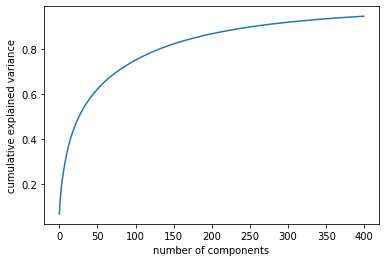

In [61]:
# scree plot

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [62]:
# how many principal components to use

explained_var = np.cumsum(pca.explained_variance_ratio_)

explained_var70 = explained_var > 0.7 
pc70 = np.where(explained_var70)[0]
print('70 percent of variance explained: ', pc70[0])

explained_var80 = explained_var > 0.8
pc80 = np.where(explained_var80)[0]
print('80 percent of variance explained: ', pc80[0])

explained_var90 = explained_var > 0.9
pc90 = np.where(explained_var90)[0]
print('90 percent of variance explained: ', pc90[0])

70 percent of variance explained:  76
80 percent of variance explained:  131
90 percent of variance explained:  253


In [63]:
# PCA with 80 percent variance
pca = PCA(n_components=132)

principals = pca.fit_transform(features)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(principals, matches, test_size=0.2, random_state=42)

In [66]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, stratify=y_train, random_state=1) 

In [67]:
import tensorflow as tf
import tensorflow.keras as keras

print('Tensorflow version: ', tf.__version__)
print('Keras version: ', keras.__version__)

Tensorflow version:  2.3.0
Keras version:  2.4.0


In [68]:
x_train[0].shape

(132,)

In [69]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Dropout

network = models.Sequential()
network.add(layers.Dense(32, activation='relu', input_shape=(132,)))
network.add(Dropout(0.2))
network.add(layers.Dense(16, activation='relu'))
network.add(Dropout(0.3))
network.add(layers.Dense(1, activation='sigmoid'))

In [70]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                4256      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [71]:
network.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [72]:
history = network.fit(x_train, y_train, epochs=100, batch_size=124, validation_data=(x_val, y_val))

Epoch 1/100
145/145 [==============================] - 1s 4ms/step - loss: 0.7087 - accuracy: 0.5111 - val_loss: 0.6942 - val_accuracy: 0.5107
Epoch 2/100
145/145 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5237 - val_loss: 0.6919 - val_accuracy: 0.5248
Epoch 3/100
145/145 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5404 - val_loss: 0.6885 - val_accuracy: 0.5374
Epoch 4/100
145/145 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5487 - val_loss: 0.6845 - val_accuracy: 0.5555
Epoch 5/100
145/145 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.5643 - val_loss: 0.6786 - val_accuracy: 0.5642
Epoch 6/100
145/145 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.5720 - val_loss: 0.6709 - val_accuracy: 0.5933
Epoch 7/100
145/145 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.5963 - val_loss: 0.6603 - val_accuracy: 0.6114

In [73]:
history_dict= history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show(*args, **kw)>

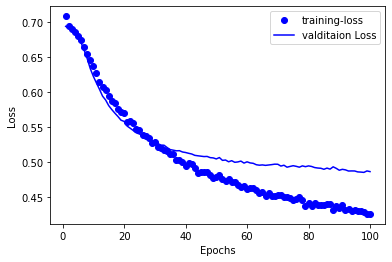

In [74]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss =history_dict["loss"]
val_loss =history_dict["val_loss"]
epochs  = range(1,len(acc)+1)
plt.plot(epochs,loss,"bo",label = "training-loss")
plt.plot(epochs,val_loss,"b",label = "valditaion Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

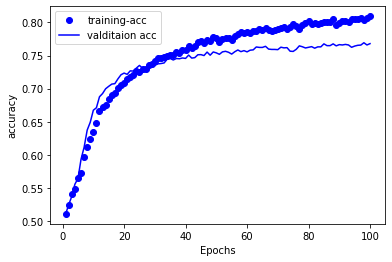

In [75]:

epochs  = range(1,len(acc)+1)
plt.plot(epochs,acc,"bo",label = "training-acc")
plt.plot(epochs,val_acc,"b",label = "valditaion acc")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show

In [76]:
y_test_pred = network.predict(x_test)
tf.math.confusion_matrix(
    y_test, y_test_pred.round(), num_classes=2, weights=None, dtype=tf.dtypes.int32,
    name=None
)
predicted= []
for i in y_test_pred:
   
    if i >0.65:
        i = 1
        predicted.append(i)
    else:
        i=0
        predicted.append(i)
    
predicted     

[0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,


In [77]:
results = network.evaluate(x_test, y_test, batch_size=128)

47/47 [==============================] - 0s 813us/step - loss: 0.4915 - accuracy: 0.7614


In [78]:
tf.math.confusion_matrix(
    y_test, predicted, num_classes=2, weights=None, dtype=tf.dtypes.int32,
    name=None
)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2529,  418],
       [1103, 1905]])>

In [79]:
y_test_pred = network.predict(x_test)
tf.math.confusion_matrix(
    y_test, y_test_pred.round(), num_classes=2, weights=None, dtype=tf.dtypes.int32,
    name=None
)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2096,  851],
       [ 570, 2438]])>

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predicted)

array([[2529,  418],
       [1103, 1905]], dtype=int64)

In [81]:
from sklearn.metrics import f1_score
f1_score(y_test,predicted)

0.714687675858188

In [82]:
from sklearn.metrics import precision_score,recall_score
print("precision scores are {} ".format(precision_score(y_test,predicted))) 
print("recall scores are{}".format(recall_score(y_test,predicted)))

precision scores are 0.8200602668962549 
recall scores are0.633311170212766


In [83]:
from sklearn.metrics import precision_score,recall_score
print("precision scores are {} ".format(precision_score(y_test,y_test_pred.round()))) 
print("recall scores are {}".format(recall_score(y_test,y_test_pred.round())))

precision scores are 0.7412587412587412 
recall scores are 0.8105053191489362


In [84]:
from sklearn.metrics import f1_score
f1_score(y_test,y_test_pred.round())

0.7743369858662855

## Recurrent Neural Network
In this section, we will try LSTM and compare the performance to the neural network above.

In [ ]:
# use selected columns from final data

data_rnn = pd.concat([final_data['professionals_id'], final_data['professionals_industry'], 
                      final_data['professionals_headline'], final_data['questions_title'], 
                      final_data['questions_body'], final_data['matches']], axis=1)
data_rnn

In [ ]:
# merge with tag_rnn

final_data_rnn = data_rnn.merge(tag_rnn, left_on='professionals_id', right_on='tag_users_user_id')
final_data_rnn

In [ ]:
# drop other columns

final_data_rnn = final_data_rnn.drop(columns=['professionals_id', 'professionals_industry', 'professionals_headline',
                                              'tag_users_user_id', 'questions_title', 
                                              'questions_body', 'tag_users_user_id', 'tags'])
final_data_rnn

In [ ]:
# split data into training and test sets
from sklearn.model_selection import train_test_split

text = final_data_rnn['all_text']
labels = np.asarray(final_data_rnn['matches'])

x_train, x_test, y_train, y_test = train_test_split(text, labels, test_size=0.3, stratify=labels, random_state=12)

In [ ]:
# model will include embedding layer first
# imputs to embedding layer must be the same length

import numpy as np

counts = []
for i in range(len(final_data_rnn['all_text'])):
    words = str(final_data_rnn['all_text'][i]).split()
    counts.append(len(words))
    
z = np.argmax(counts)
counts[z] # the longest is 1186


In [ ]:
# use keras libraries to preprocess text 

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

maxlen = 1186
max_words = 10000 # include only top 10,000 words in dataset because of memory/speed of processing

# tokenize and preprocess text
# fit tokenizer on x_train
tokenizer = Tokenizer(num_words=max_words, filters='1234567890!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(x_train)

# apply tokenizer to x_train and x_test 
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
#print(x_train[1])

# look up dictionary
word_index = tokenizer.word_index 

# pad train and test so they are all the same length
x_train = pad_sequences(x_train, maxlen=maxlen)  
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

In [ ]:
# import libraries 

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [ ]:
# neural network with embedding layer and LSTM layer

model = Sequential()
model.add(Embedding(max_words, 100, input_length=maxlen)) 
model.add(LSTM(32)) 
model.add(Dense(1, activation='sigmoid')) 

model.summary()

In [ ]:
# compile model

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# fit model

history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.2)

#### Note that the above cell took 6 hours to run. We have copied the results below in a markdown cell.
The model did not perform well but we were unable to tune the parameters due to the time it took to run and not having enough computing power.

Epoch 1/20
33/33 [==============================] - 410s 12s/step - loss: 0.6938 - accuracy: 0.4754 - val_loss: 0.6938 - val_accuracy: 0.4626  
Epoch 2/20
33/33 [==============================] - 431s 13s/step - loss: 0.6930 - accuracy: 0.5098 - val_loss: 0.6955 - val_accuracy: 0.4448  
Epoch 3/20
33/33 [==============================] - 609s 18s/step - loss: 0.6921 - accuracy: 0.5254 - val_loss: 0.6992 - val_accuracy: 0.4422  
Epoch 4/20
33/33 [==============================] - 753s 23s/step - loss: 0.6899 - accuracy: 0.5354 - val_loss: 0.7125 - val_accuracy: 0.4170  
Epoch 5/20
33/33 [==============================] - 730s 22s/step - loss: 0.6856 - accuracy: 0.5498 - val_loss: 0.7246 - val_accuracy: 0.3968  
Epoch 6/20
33/33 [==============================] - 863s 26s/step - loss: 0.6805 - accuracy: 0.5608 - val_loss: 0.7448 - val_accuracy: 0.3836  
Epoch 7/20
33/33 [==============================] - 983s 30s/step - loss: 0.6747 - accuracy: 0.5731 - val_loss: 0.7805 - val_accuracy: 0.3613  
Epoch 8/20
33/33 [==============================] - 1031s 31s/step - loss: 0.6687 - accuracy: 0.5800 - val_loss: 0.7941 - val_accuracy: 0.3594  
Epoch 9/20
33/33 [==============================] - 966s 29s/step - loss: 0.6625 - accuracy: 0.5872 - val_loss: 0.8130 - val_accuracy: 0.3402  
Epoch 10/20
33/33 [==============================] - 1260s 38s/step - loss: 0.6568 - accuracy: 0.5990 - val_loss: 0.8405 - val_accuracy: 0.3280  
Epoch 11/20
33/33 [==============================] - 1227s 37s/step - loss: 0.6519 - accuracy: 0.5993 - val_loss: 0.8501 - val_accuracy: 0.3273  
Epoch 12/20
33/33 [==============================] - 1199s 36s/step - loss: 0.6458 - accuracy: 0.6087 - val_loss: 0.8756 - val_accuracy: 0.3129  
Epoch 13/20
33/33 [==============================] - 1119s 34s/step - loss: 0.6414 - accuracy: 0.6090 - val_loss: 0.8742 - val_accuracy: 0.3035  
Epoch 14/20
33/33 [==============================] - 1144s 35s/step - loss: 0.6367 - accuracy: 0.6155 - val_loss: 0.9423 - val_accuracy: 0.3049  
Epoch 15/20
33/33 [==============================] - 682s 21s/step - loss: 0.6314 - accuracy: 0.6180 - val_loss: 0.9504 - val_accuracy: 0.3045  
Epoch 16/20
33/33 [==============================] - 763s 23s/step - loss: 0.6264 - accuracy: 0.6225 - val_loss: 1.0228 - val_accuracy: 0.3042  
Epoch 17/20
33/33 [==============================] - 844s 26s/step - loss: 0.6222 - accuracy: 0.6211 - val_loss: 1.0281 - val_accuracy: 0.2958  
Epoch 18/20
33/33 [==============================] - 772s 23s/step - loss: 0.6173 - accuracy: 0.6234 - val_loss: 1.0503 - val_accuracy: 0.2985  
Epoch 19/20
33/33 [==============================] - 813s 25s/step - loss: 0.6125 - accuracy: 0.6233 - val_loss: 1.0799 - val_accuracy: 0.2944  
Epoch 20/20
33/33 [==============================] - 807s 24s/step - loss: 0.6079 - accuracy: 0.6277 - val_loss: 1.0658 - val_accuracy: 0.2879

In [ ]:
# plot training and validation accuracy curves

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, color='red', label='Training accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [ ]:
# plot training and validation loss curves

plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# evaluate model on test set

test_loss, test_acc = model.evaluate(x_test, y_test)

### Areas of further analysis:
- further tune the LSTM model
- Recommender System